# Regularization Demo
## Ridge, Lasso y Elastic Net
### 1. Cargamos librerías

In [13]:
#import modules
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn import datasets

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV #Grid_Search_Cross_Validation

%matplotlib inline

### 2. Vemos qué pinta tiene el dataset

In [5]:
boston_dataset = datasets.load_boston()
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 3. Rápido análisis exploratorio para ver sus dependencias lineales

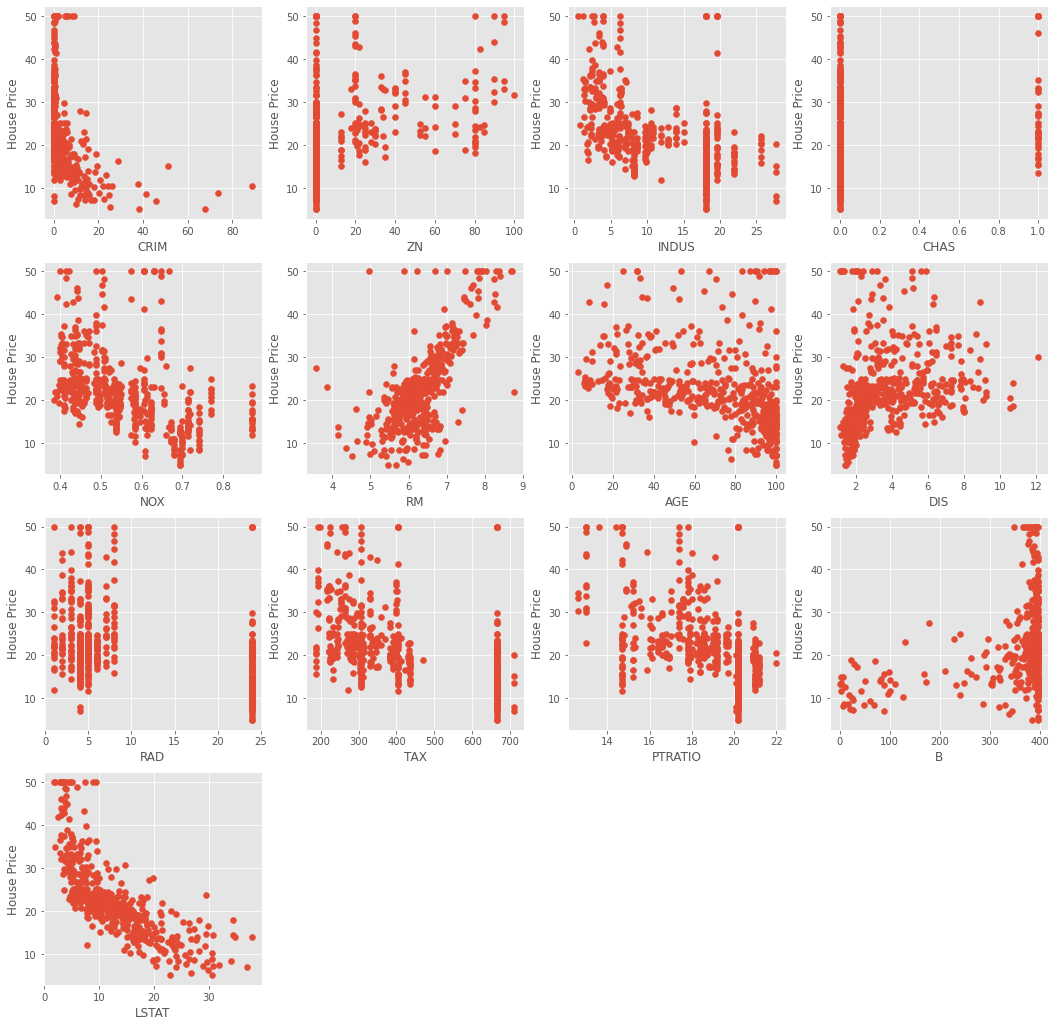

In [7]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(18,18))

for index, feature_name in enumerate(boston_dataset.feature_names):
    ax = fig.add_subplot(4,4,index+1)
    ax.scatter(boston_dataset.data[:,index], boston_dataset.target)
    ax.set_ylabel('House Price', size=12)
    ax.set_xlabel(feature_name, size=12)

### 4. Preprocesado de los datos

In [9]:
boston_df = pd.DataFrame(boston_dataset.data)
boston_df.columns = boston_dataset.feature_names
boston_df_target = np.array(boston_dataset.target)
boston_df['House Price'] =  pd.Series(boston_df_target)

In [11]:
X = boston_df.iloc[:,:-1]
y = boston_df.iloc[:,-1]

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

### 5. Regresión lineal múltiple

In [16]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)

lreg_y_pred = lreg.predict(X_test)
mse = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared error on test set:", mse)

lreg_coefficient = pd.DataFrame()
lreg_coefficient['Columns'] = X_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
lreg_coefficient

Mean squared error on test set: 22.098694827098438


,Columns,Coefficient Estimate
0,CRIM,-0.128323
1,ZN,0.029552
2,INDUS,0.048859
3,CHAS,2.773503
4,NOX,-16.238829
5,RM,4.368755
6,AGE,-0.009248
7,DIS,-1.400867
8,RAD,0.257761
9,TAX,-0.009957


In [17]:
print('Coefficientes:', lreg.coef_)
print('Interceptor:', lreg.intercept_)

Coefficientes: [-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01]
Interceptor: 29.83642016383853


Pintamos los coeficientes para verlos mejor

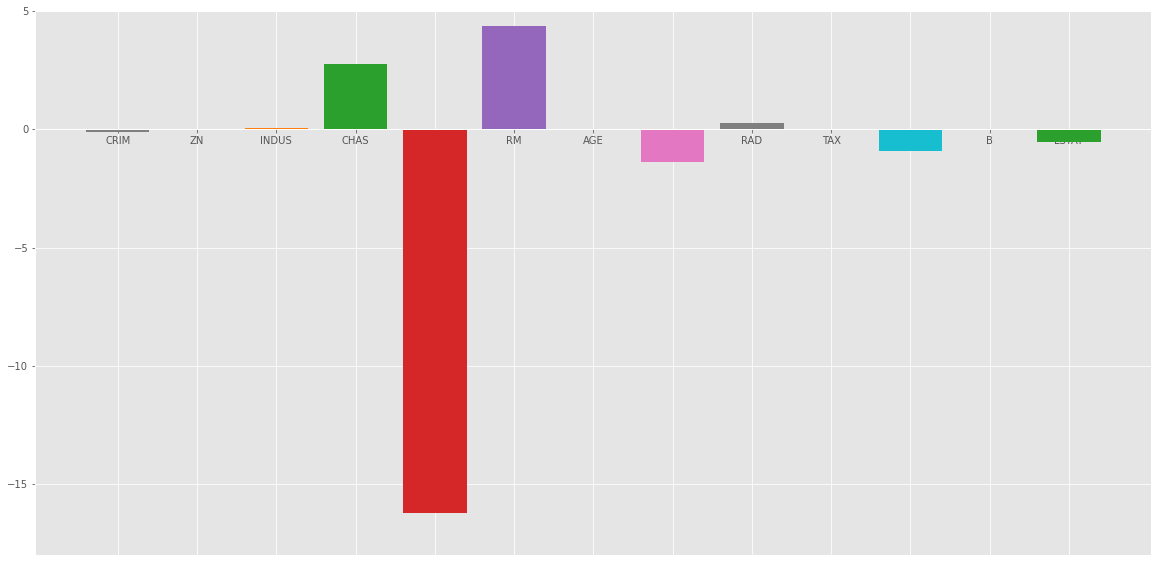

In [30]:
fig, ax = plt.subplots(figsize= (20,10))

color = ['tab:gray', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lreg_coefficient['Columns'],
        lreg_coefficient['Coefficient Estimate'],
        color = color)

ax.spines['bottom'].set_position('zero')
ax.set_ylim([-18,5])

plt.style.use('ggplot')

### 6. Ridge regression

In [20]:
from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha=1)
ridgeR.fit(X_train, y_train)

y_pred = ridgeR.predict(X_test)

mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

ridge_coefficient = pd.DataFrame()
ridge_coefficient['Columns'] = X_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)

ridge_coefficient

22.48047550123386


,Columns,Coefficient Estimate
0,CRIM,-0.123830
1,ZN,0.031392
2,INDUS,0.017677
3,CHAS,2.542772
4,NOX,-8.772492
5,RM,4.379802
6,AGE,-0.015373
7,DIS,-1.290861
8,RAD,0.244068
9,TAX,-0.010824


In [21]:
print('Coeffientes: ',ridgeR.coef_)
print('Intercept: ', ridgeR.intercept_)

Coeffientes:  [-0.12383039  0.03139178  0.01767668  2.54277179 -8.77249222  4.37980204
 -0.01537349 -1.29086084  0.24406848 -0.01082435 -0.83346553  0.01348642
 -0.53435396]
Intercept:  24.878370472969383


#### Veamos en la gráfica cómo quedaría para alpha = 1

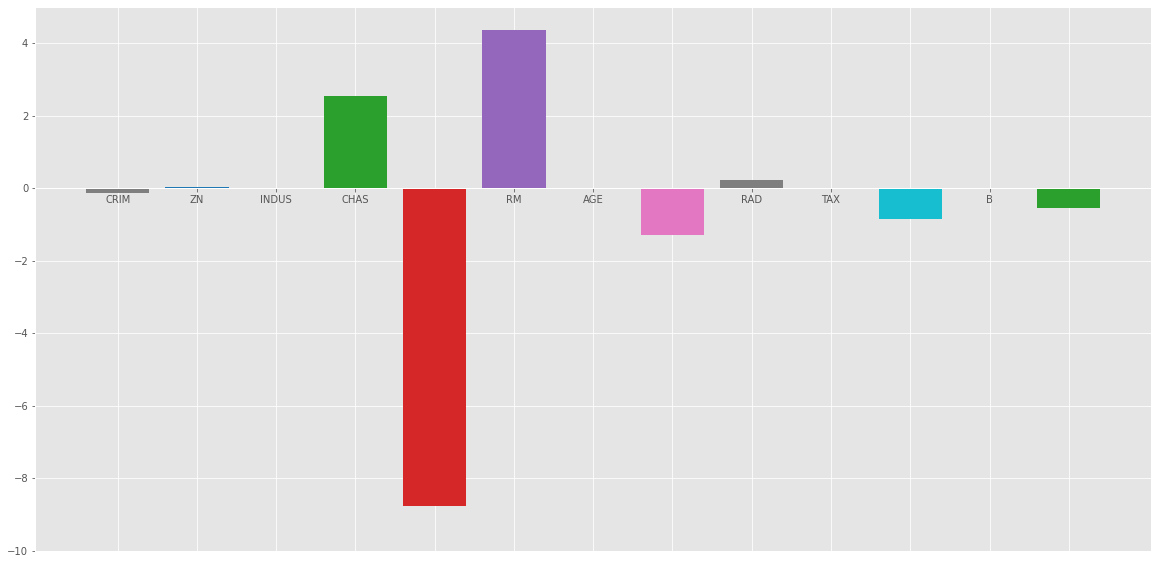

In [29]:
fig, ax = plt.subplots(figsize=(20,10))

color = ['tab:gray', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(ridge_coefficient['Columns'],
        ridge_coefficient['Coefficient Estimate'],
        color = color)

ax.spines['bottom'].set_position('zero')
ax.set_ylim([-10,5])

plt.style.use('ggplot')


Si hacemos ahora alpha = 10

In [31]:
ridgeR = Ridge(alpha=10)
ridgeR.fit(X_train, y_train)

y_pred = ridgeR.predict(X_test)

mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

ridge_coefficient = pd.DataFrame()
ridge_coefficient['Columns'] = X_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)

ridge_coefficient

22.939228679246224


,Columns,Coefficient Estimate
0,CRIM,-0.121375
1,ZN,0.034219
2,INDUS,-0.013070
3,CHAS,1.821026
4,NOX,-1.687473
5,RM,4.090102
6,AGE,-0.018418
7,DIS,-1.188068
8,RAD,0.243519
9,TAX,-0.012083


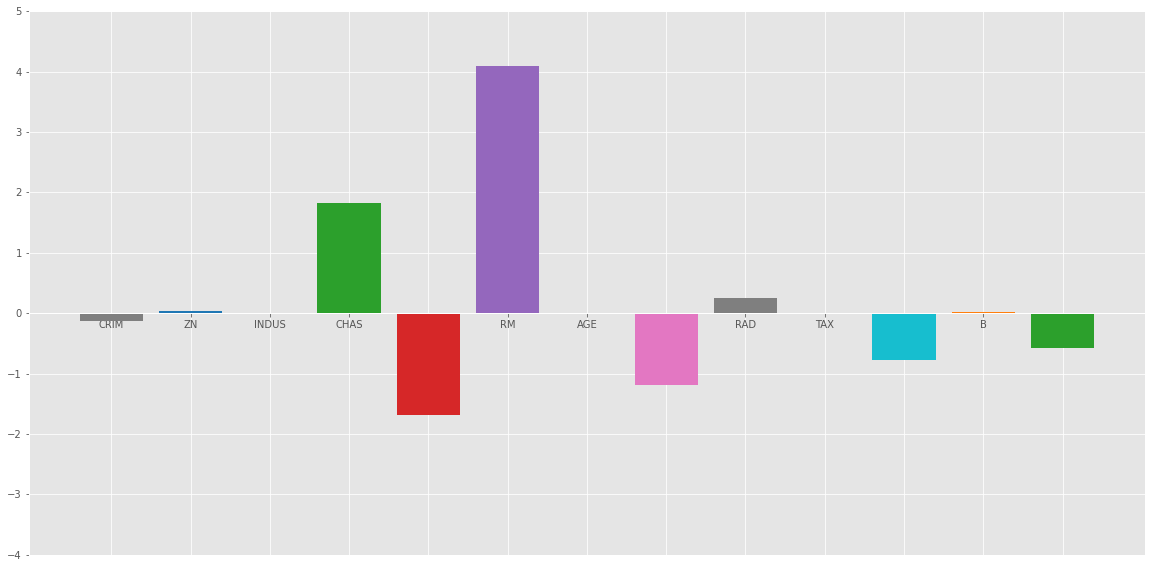

In [33]:
fig, ax = plt.subplots(figsize=(20,10))

color = ['tab:gray', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(ridge_coefficient['Columns'],
        ridge_coefficient['Coefficient Estimate'],
        color = color)

ax.spines['bottom'].set_position('zero')
ax.set_ylim([-4,5])

plt.style.use('ggplot')

### 7. Lasso regression

In [34]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)

lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

mean_squared_error_lasso = np.mean((y_pred - y_test)**2)
print("2Mean squared error on test set", mean_squared_error_lasso)

lasso_coefficient = pd.DataFrame()
lasso_coefficient['Columns'] = X_train.columns
lasso_coefficient['Coefficient Estimate'] = pd.Series(lasso.coef_)

lasso_coefficient

2Mean squared error on test set 24.39075259035517


,Columns,Coefficient Estimate
0,CRIM,-0.083898
1,ZN,0.026461
2,INDUS,-0.000000
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,1.545450
6,AGE,0.013458
7,DIS,-0.582829
8,RAD,0.207381
9,TAX,-0.011213


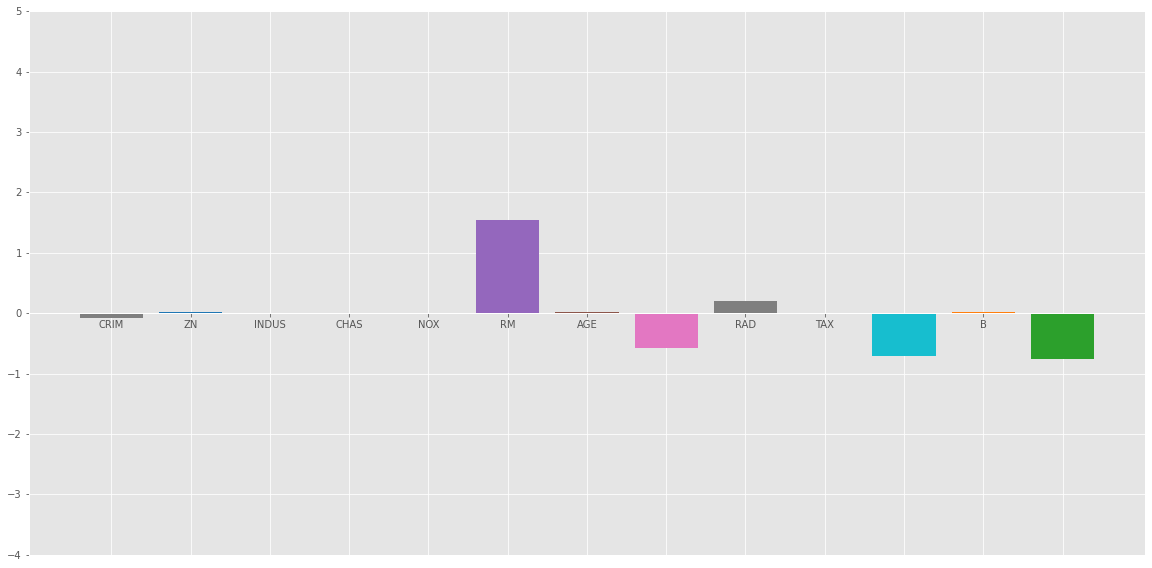

In [35]:
fig, ax = plt.subplots(figsize=(20,10))

color = ['tab:gray', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lasso_coefficient['Columns'],
        lasso_coefficient['Coefficient Estimate'],
        color = color)

ax.spines['bottom'].set_position('zero')
ax.set_ylim([-4,5])

plt.style.use('ggplot')

In [38]:
lasso = Lasso(alpha=10)

lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

mean_squared_error_lasso = np.mean((y_pred - y_test)**2)
print("2Mean squared error on test set", mean_squared_error_lasso)

lasso_coefficient = pd.DataFrame()
lasso_coefficient['Columns'] = X_train.columns
lasso_coefficient['Coefficient Estimate'] = pd.Series(lasso.coef_)

lasso_coefficient

2Mean squared error on test set 35.391737651173884


,Columns,Coefficient Estimate
0,CRIM,-0.000000
1,ZN,0.008066
2,INDUS,-0.000000
3,CHAS,0.000000
4,NOX,0.000000
5,RM,0.000000
6,AGE,0.000000
7,DIS,-0.000000
8,RAD,0.000000
9,TAX,-0.008968


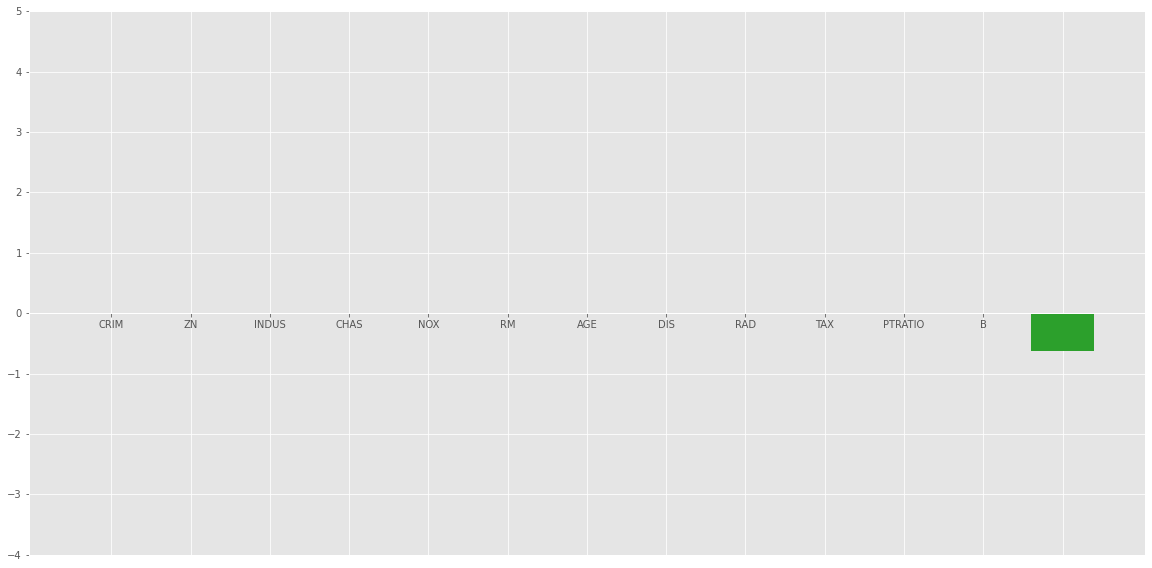

In [39]:
fig, ax = plt.subplots(figsize=(20,10))

color = ['tab:gray', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lasso_coefficient['Columns'],
        lasso_coefficient['Coefficient Estimate'],
        color = color)

ax.spines['bottom'].set_position('zero')
ax.set_ylim([-4,5])

plt.style.use('ggplot')

### 8. Elastic Net

Conclusion :
From the above analysis we can reach the following conclusion about different regularization methods:

Regularization is used to reduce the dependence on any particular independent variable by adding the penalty term to the Loss function. This term prevents the coefficients of the independent variables to take extreme values.
Ridge Regression adds L2 regularization penalty term to loss function. This term reduces the coefficients but does not make them 0 and thus doesn’t eliminate any independent variable completely. It can be used to measure the impact of the different independent variables.
Lasso Regression adds L1 regularization penalty term to loss function. This term reduces the coefficients as well as makes them 0 thus effectively eliminate the corresponding independent variable completely. It can be used for feature selection etc.
Elastic Net is a combination of both of the above regularization. It contains both the L1 and L2 as its penalty term. It performs better than Ridge and Lasso Regression for most of the test cases.
